# 0. Library imports and parameter declaration

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

random_state = 42 # set in order to guarantee repetability of results
data_url = 'exam_2021_01_27.csv' # path to the dataset
sep = ',' #separator for the dataset's csv file
header = None #indication for the header in the read_csv function
train_size = 0.8

# 1. Load and show the data

First the dataset is loaded from the csv and the first rows are shown:

In [5]:
df = pd.read_csv(data_url, sep=sep, header=header)
df.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


Then, a short description of the dataset is shown:

In [6]:
df.describe() # it shows only the description of numerical data

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [8]:
cat_attributes = df.dtypes.loc[df.dtypes=='object'].index.values #recovering indexes for categorical attributes
df[cat_attributes].describe()

,2
count,150
unique,4
top,a
freq,50


And finally, the number of rows and columns is printed:

In [76]:
print("The number of rows in the dataset is {}".format(df.shape[0]))
print("The number of columns in the dataset is {}".format(df.shape[1]))

The number of rows in the dataset is 150
The number of columns in the dataset is 5


# 2. Dropping null values
Since the dataset contains null values, they must be dropped

In [77]:
df_c = df.dropna(axis=0) # dropping rows (axis is 0)
print("After removal, the number of rows in the dataset is {}".format(df_c.shape[0]))

After removal, the number of rows in the dataset is 122


# 3. Converting ordinal column to numeric

In [78]:
focus = [2] # list of ordinal attributes
transf_dtype = np.int32 # type to be used when converting


ordinal_transformer = OrdinalEncoder(dtype = transf_dtype) # we assume the values are encoded so that lexicographic order = intended order
df_c2 = df_c.copy()
df_c2[focus] = ordinal_transformer.fit_transform(df_c[focus])

# 4. Train and Test set split
Then the dataset must be split first in X and y (respectively the independent attributes data matrix and the class vector) and then in training and test set.

In [79]:
class_col = 4 # select the last column
X = df_c2.drop(class_col, axis=1)
y = df_c2[class_col]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size = train_size)
print("Xtrain shape: {}".format(Xtrain.shape))
print("Xtest shape: {}".format(Xtest.shape))

Xtrain shape: (97, 4)
Xtest shape: (25, 4)


# 5. Train two models

The first model chosen for classification is a decision tree. In order to tune the main hyperparameters (max_depth, criterion and min_samples_split) a grid search is performed

The second model is a KNN-classifier. GridSearch is used also to tune together weights and n_neigbors

# 6. Tune model1


In [87]:
score = 'accuracy'
cv = 5 #number of split for cross validation
model1_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
model1_est = DecisionTreeClassifier(random_state=random_state)


model1 = GridSearchCV(model1_est, model1_param, scoring=score, cv=5) 
model1.fit(X,y)

print("The best found hyperparameters are: {}".format(model1.best_params_))
print("The corresponding {} on validation is: {}".format(score, model1.best_score_*100))

The best found hyperparameters are: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
The corresponding accuracy on validation is: 0.975


# 7. Produce results on test set for model1

The accuracy on test set is 96.00%


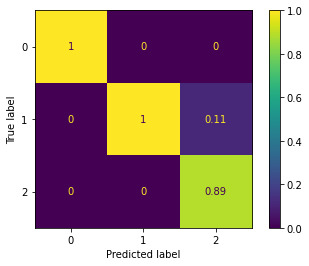

In [86]:
ypred1 = model1.predict(Xtest)
acc1 = accuracy_score(ytest, ypred1)
print("The accuracy on test set is {:.2f}%".format(acc1*100))
plot_confusion_matrix(model1, Xtest, ytest, normalize='pred');


# 8. Tune model2

In [82]:
score = 'accuracy'
cv = 5 #number of split for cross validation
knn_param = {'weights':['distance', 'uniform'], 'n_neighbors':[3,5,7,9,11]}


model2 = GridSearchCV(KNeighborsClassifier(), knn_param, scoring=score, cv=5) 
model2.fit(X,y)

print("The best found hyperparameters are: {}".format(model2.best_params_))
print("The corresponding {} on validation is: {}".format(score, model2.best_score_))

The best found hyperparameters are: {'n_neighbors': 5, 'weights': 'distance'}
The corresponding accuracy on validation is: 0.9586666666666666


# 9. Produce results on test set for model2

The accuracy on test set is 100.00%


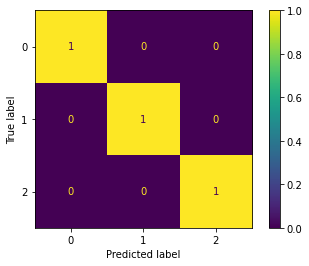

In [84]:
ypred2 = model2.predict(Xtest)
acc1 = accuracy_score(ytest, ypred2)
print("The accuracy on test set is {:.2f}%".format(acc1*100))
plot_confusion_matrix(model2, Xtest, ytest, normalize='pred');
